<b>DATA VISUALIZATION WITH PYTHON MATPLOTLIB FOR BEGINNER - PART 1</b><br><br>

Nama: Andrean Yonathan |
Email: andreanynthn@students.undip.ac.id |
Telp/WA: 089606707966

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

<b><i>1. Pengenalan dan Persiapan Dataset </i></b>

In [2]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas\n', dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas
    order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


*   order_id : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer
*   order_date : tanggal terjadinya transaksi
*   customer_id : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali
*   city : kota tempat toko terjadinya transaksi
*   province : provinsi (berdasarkan city)
*   product_id : ID dari suatu product yang dibeli
*   brand : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama
*   quantity : Kuantitas / banyaknya product yang dibeli
*  item_price : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli

<i>1.1 Penambahan kolom order_month </i>

In [3]:
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset['order_month'])

0       2019-10
1       2019-10
2       2019-11
3       2019-08
4       2019-10
         ...   
4995    2019-12
4996    2019-07
4997    2019-10
4998    2019-10
4999    2019-11
Name: order_month, Length: 5000, dtype: object


<i>1.2 Penambahan kolom gmv </i>

In [4]:
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
print(dataset['gmv'])

0       7400000
1       1208000
2       8360000
3        820000
4       8950000
         ...   
4995     900000
4996    4395000
4997    2988000
4998    5560000
4999    1045000
Name: gmv, Length: 5000, dtype: int64


<b><i>2. Plot Pertama Dengan Matplotlib</i></b>

<i>2.1 Membuat data agregat</i>

In [5]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


<i>2.2 Plot Pertama: Membuat Line Chart Trend Pertumbuhan GMV</i>

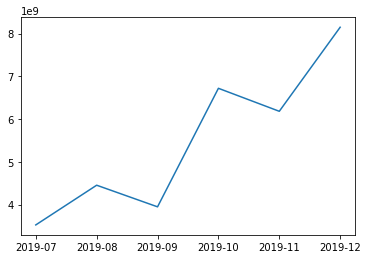

In [6]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

<i>2.3 Cara alternatif; Fungsi .plot() Pada Pandas Dataframe</i>

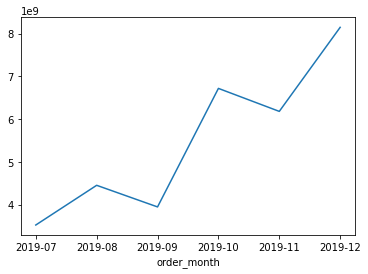

In [7]:
dataset.groupby('order_month')['gmv'].sum().plot()
plt.show()

<b><i>3. Kustomisasi Grafik - Part 1</i></b>

<i>3.1 Mengubah Figure Size</i>

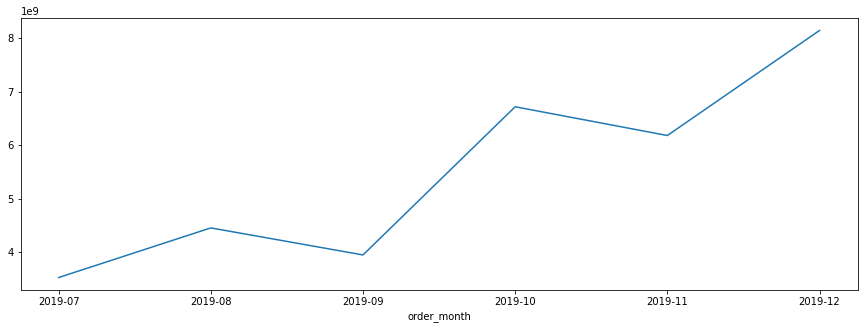

In [8]:
plt.figure(figsize = (15,5))
dataset.groupby('order_month')['gmv'].sum().plot()
plt.show()

<i>3.2 Menambahkan Title dan Axis Labels</i>

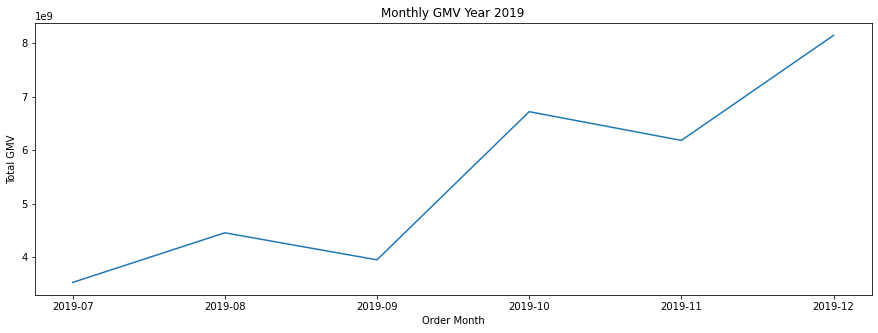

In [9]:
plt.figure(figsize = (15,5))
dataset.groupby('order_month')['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

<i>3.3 Kustomisasi Title dan Axis Labels</i>

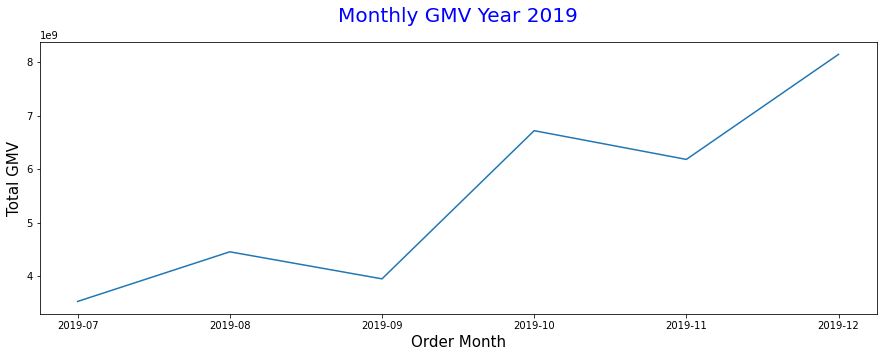

In [10]:
plt.figure(figsize = (15,5))
dataset.groupby('order_month')['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', pad = 20, loc = 'center', fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total GMV', fontsize = 15)
plt.show()

<i>3.4 Kustomisasi Line dan Point</i>

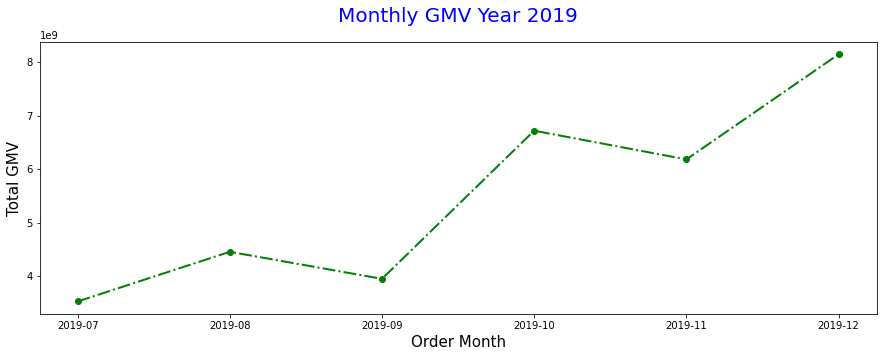

In [11]:
plt.figure(figsize = (15,5))
dataset.groupby('order_month')['gmv'].sum().plot(color = 'green', linestyle = '-.',
                                                 marker = 'o', linewidth = 2)
plt.title('Monthly GMV Year 2019', pad = 20, loc = 'center', fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total GMV', fontsize = 15)
plt.show()

<i>3.5 Kustomisasi Grid</i>

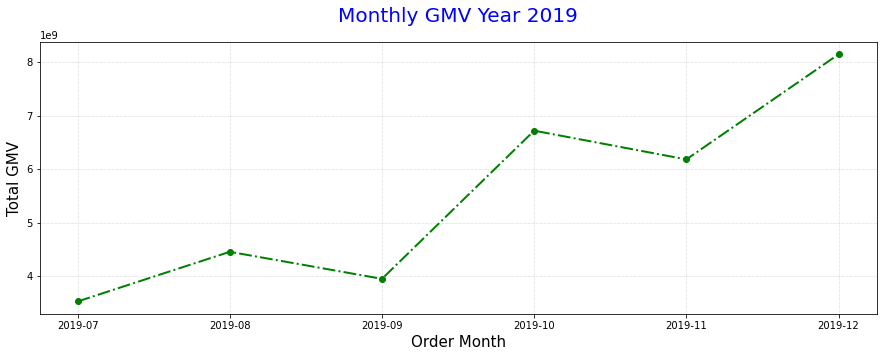

In [12]:
plt.figure(figsize = (15,5))
dataset.groupby('order_month')['gmv'].sum().plot(color = 'green', linestyle = '-.',
                                                 marker = 'o', linewidth = 2)
plt.title('Monthly GMV Year 2019', pad = 20, loc = 'center', fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total GMV', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.5)
plt.show()

<b><i>4. Kustomisasi Grafik - Part 2</i></b>

<i>4.1 Kustomisasi Axis Ticks</i>

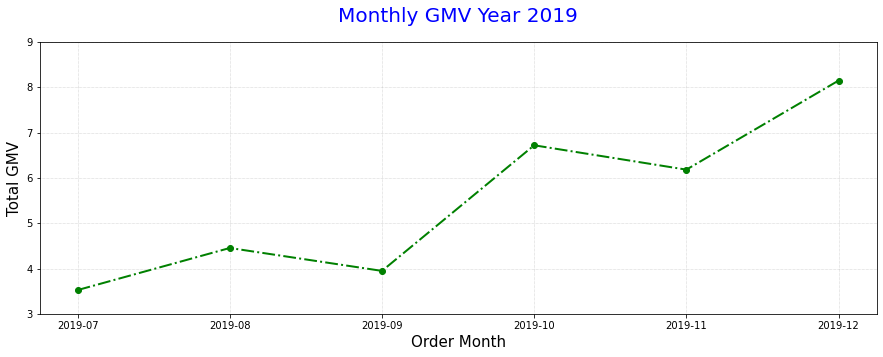

In [13]:
plt.figure(figsize = (15,5))
dataset.groupby('order_month')['gmv'].sum().plot(color = 'green', linestyle = '-.',
                                                 marker = 'o', linewidth = 2)
plt.title('Monthly GMV Year 2019', pad = 20, loc = 'center', fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total GMV', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

<i>4.2 Menentukan Batas Minimun dan Maksimum Axis Ticks</i>

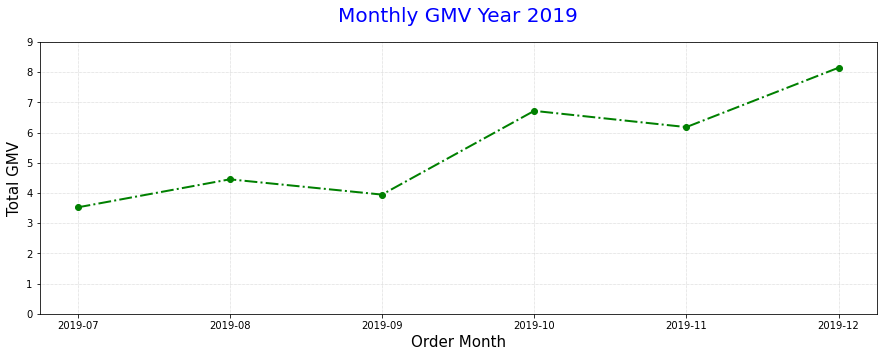

In [14]:
plt.figure(figsize = (15,5))
dataset.groupby('order_month')['gmv'].sum().plot(color = 'green', linestyle = '-.',
                                                 marker = 'o', linewidth = 2)
plt.title('Monthly GMV Year 2019', pad = 20, loc = 'center', fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total GMV', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

<i>4.2 Menambahkan Informasi Pada Plot</i>

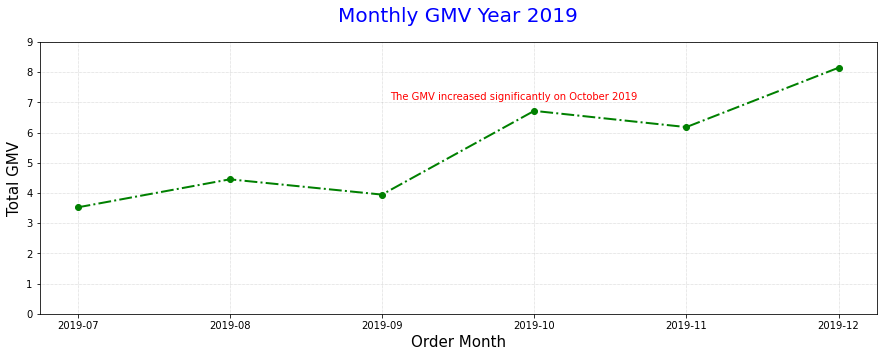

In [15]:
fig = plt.figure(figsize = (15,5))
dataset.groupby('order_month')['gmv'].sum().plot(color = 'green', linestyle = '-.',
                                                 marker = 'o', linewidth = 2)
plt.title('Monthly GMV Year 2019', pad = 20, loc = 'center', fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total GMV', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019',
         transform=fig.transFigure, color='red')
plt.show()

<i>4.3 Menyimpan Hasil Plot Menjadi File Image</i>

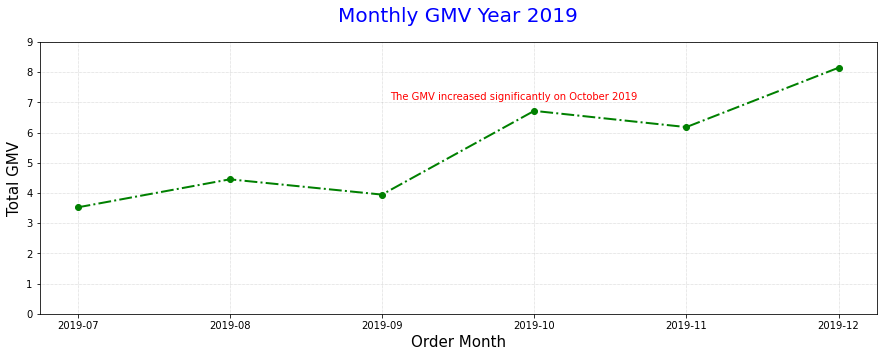

In [16]:
fig = plt.figure(figsize = (15,5))
dataset.groupby('order_month')['gmv'].sum().plot(color = 'green', linestyle = '-.',
                                                 marker = 'o', linewidth = 2)
plt.title('Monthly GMV Year 2019', pad = 20, loc = 'center', fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total GMV', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019',
         transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png')
plt.show()

<b><i>MINI PROJECT -- MINI PROJECT -- MINI PROJECT -- MINI PROJECT -- MINI PROJECT</i></b>

<b><i>Study Kasus dari Senja: Daily number of customers on Desember</i></b><br><br>
Dengan menggunakan dataset yang sama ('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv'), buatlah sebuah line chart dengan Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember.

Beberapa spesifikasi yang harus diperhatikan:

*   Ukuran figure adalah 10x5
*   Sumbu-x adalah tanggal pembelian, dari tanggal 1 - 31 Desember 2019
*   Sumbu-y adalah jumlah unique customers di tiap tanggal
*   Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri

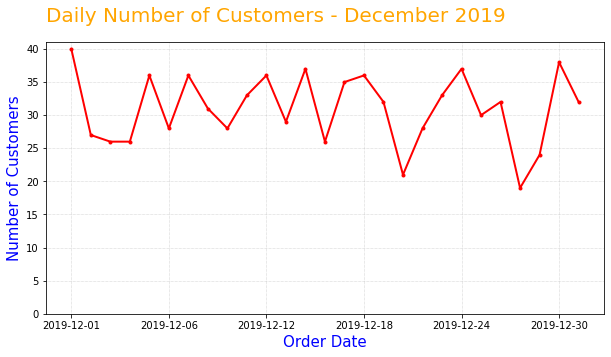

In [17]:
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()